In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv("https://raw.githubusercontent.com/dsrscientist/DSData/master/Telecom_customer_churn.csv")

In [3]:
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


here,we can see that there are 7043 rows and 21 columns in dataframe

In [4]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

we can see that there is  no null values

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


in the information we can see that there are 3 numericals columns and 18 object columns

In [6]:
# dropping columns 
df.drop('customerID',axis=1,inplace=True)

In [7]:
df.isnull().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [8]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


here, we can see that the description

<AxesSubplot:xlabel='Churn', ylabel='count'>

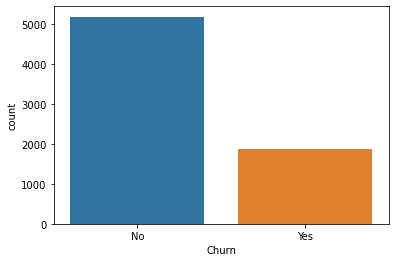

In [9]:
sns.countplot(df['Churn'])

we can see that the data is imbalanced

## EDA

In [10]:
import matplotlib.pyplot as plt

In [11]:
df

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


<AxesSubplot:xlabel='PaymentMethod', ylabel='count'>

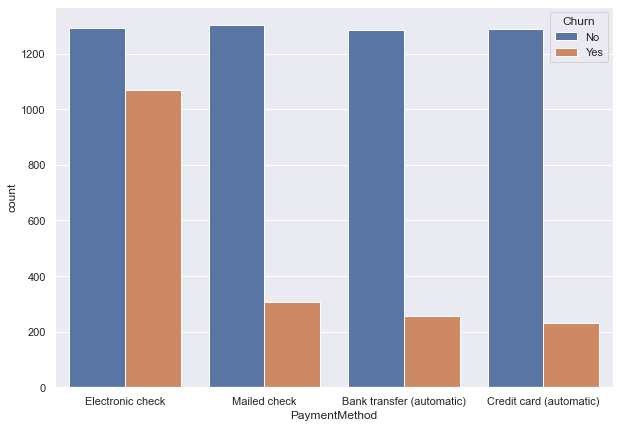

In [12]:
plt.figure(figsize=(10, 7))
sns. set(color_codes=True)
sns.countplot(x='PaymentMethod',hue='Churn',data= df )

Here We can notice Churn rate is very high in those are having Electronic check of payment method
and Its almost equal in other PaymentMethods

<AxesSubplot:xlabel='PaperlessBilling', ylabel='count'>

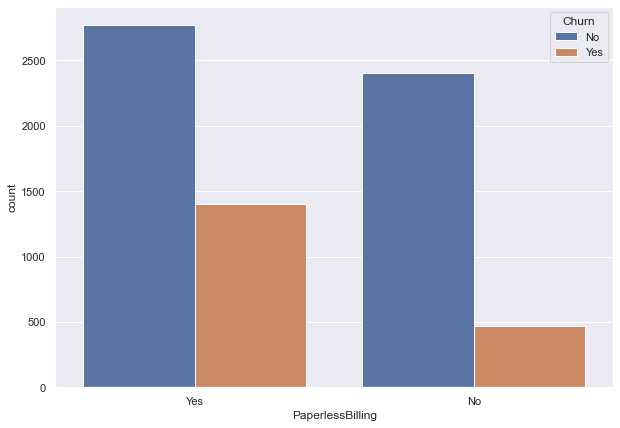

In [13]:
plt.figure(figsize=(10, 7))
sns. set(color_codes=True)
sns.countplot(x='PaperlessBilling',hue='Churn',data= df )

We can see here the cx those are having PaperlessBilling, Churn rate is high in them

<AxesSubplot:xlabel='Contract', ylabel='count'>

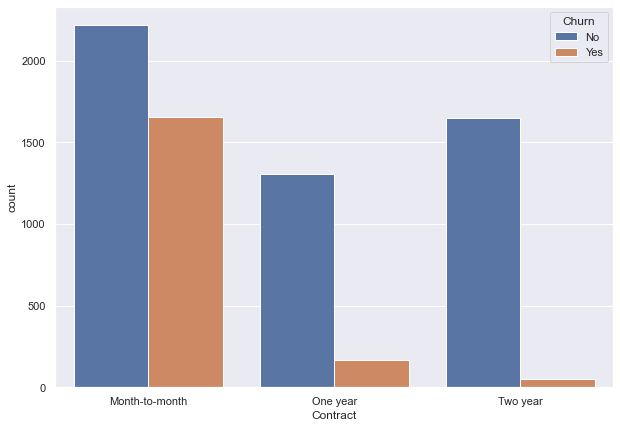

In [14]:
plt.figure(figsize=(10, 7))
sns. set(color_codes=True)
sns.countplot(x='Contract',hue='Churn',data= df )

We can see Churn rate is very high in cx those on Month to Month contract and getting lower when cx taking for long time contract

<AxesSubplot:xlabel='StreamingMovies', ylabel='count'>

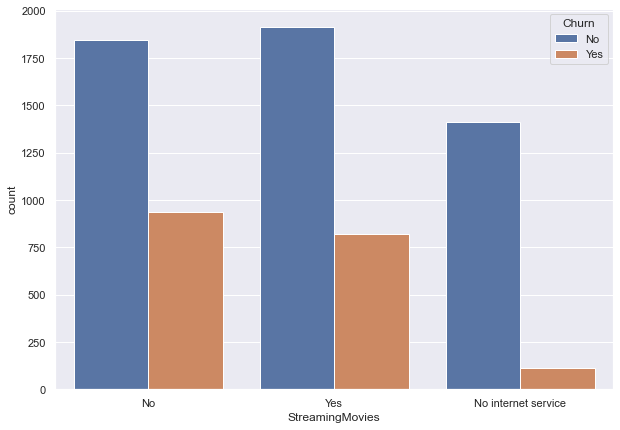

In [15]:
plt.figure(figsize=(10, 7))
sns. set(color_codes=True)
sns.countplot(x='StreamingMovies',hue='Churn',data= df )

In service of StreamingMovies we can also notice cx those are not having, their Churn rate is little high than the cx those are having the service

<AxesSubplot:xlabel='StreamingTV', ylabel='count'>

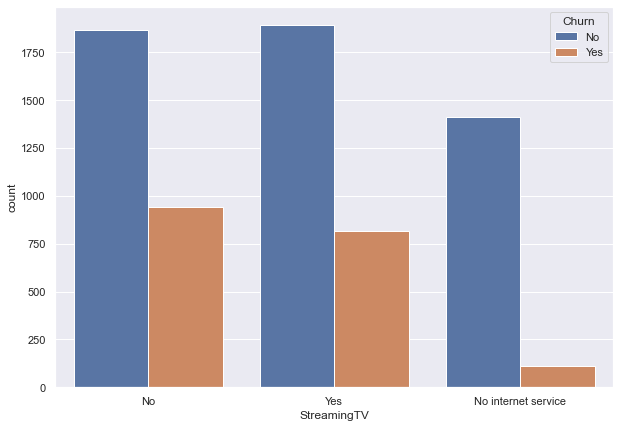

In [16]:
plt.figure(figsize=(10, 7))
sns. set(color_codes=True)
sns.countplot(x='StreamingTV',hue='Churn',data= df )

In The servcie of StreamingTV Churn Rate little more for those not having the service of StreamingTV

<AxesSubplot:xlabel='TechSupport', ylabel='count'>

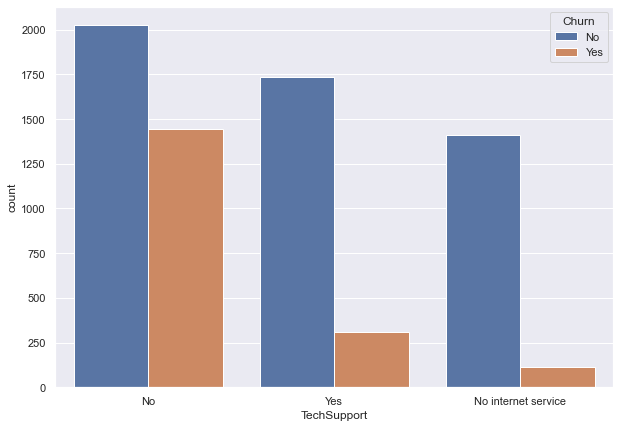

In [17]:
plt.figure(figsize=(10, 7))
sns. set(color_codes=True)
sns.countplot(x='TechSupport',hue='Churn',data= df )

We can notice churn is very high where cx doesn't have TechSupport

<AxesSubplot:xlabel='DeviceProtection', ylabel='count'>

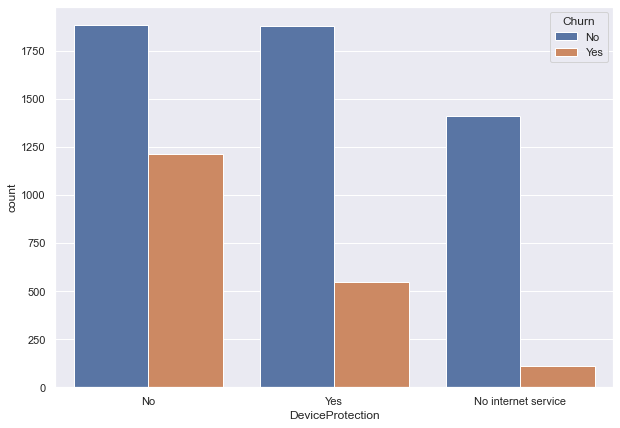

In [18]:
plt.figure(figsize=(10, 7))
sns. set(color_codes=True)
sns.countplot(x='DeviceProtection',hue='Churn',data= df )

Here we also notice Churn is high where cx is not having Device Protection

<AxesSubplot:xlabel='OnlineSecurity', ylabel='count'>

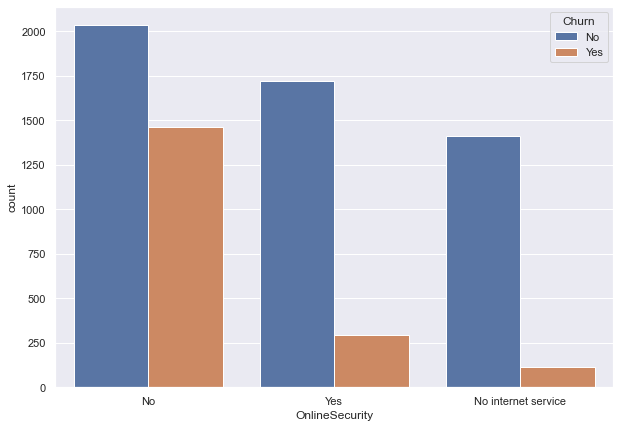

In [19]:
plt.figure(figsize=(10, 7))
sns. set(color_codes=True)
sns.countplot(x='OnlineSecurity',hue='Churn',data= df )

Cx those are not having Online Security, Churn is very high,
Churn is low where having Online Security and no internet service

<AxesSubplot:xlabel='InternetService', ylabel='count'>

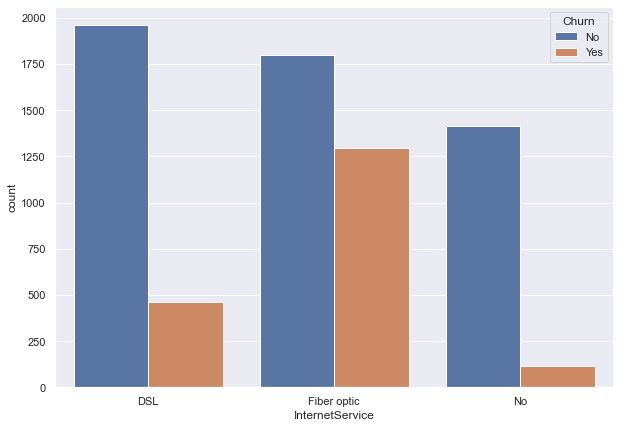

In [20]:
plt.figure(figsize=(10, 7))
sns. set(color_codes=True)
sns.countplot(x='InternetService',hue='Churn',data= df )

Churn is very high in cx of Fiber Optic Internet service,
Churn is very low where cx doesn't have Internet service

<AxesSubplot:xlabel='MultipleLines', ylabel='count'>

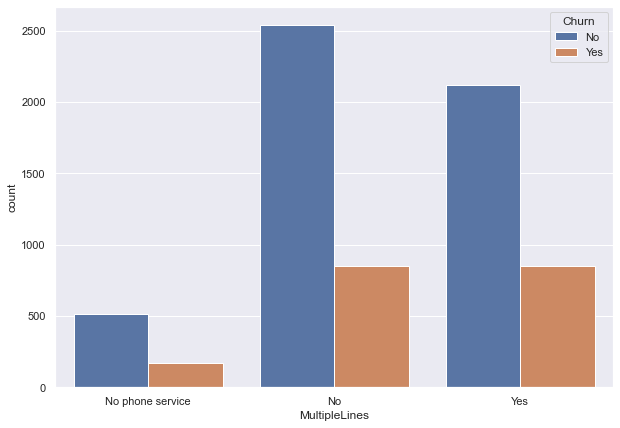

In [21]:
plt.figure(figsize=(10, 7))
sns. set(color_codes=True)
sns.countplot(x='MultipleLines',hue='Churn',data= df )

Churn Percentage is high where cx having multiple lines.
There are some cx as well, who doesn't have Phone service

<AxesSubplot:xlabel='PhoneService', ylabel='count'>

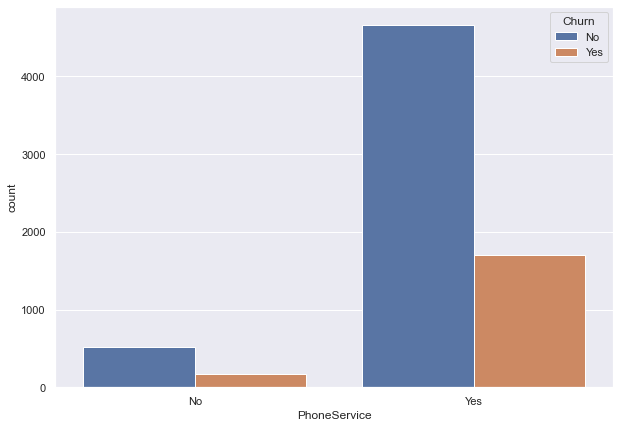

In [22]:
plt.figure(figsize=(10, 7))
sns. set(color_codes=True)
sns.countplot(x='PhoneService',hue='Churn',data= df )

We can see most the cx having PhoneService, few of them not having PhoneService.
Churn is also high in cx having PhoneService

<AxesSubplot:xlabel='tenure', ylabel='count'>

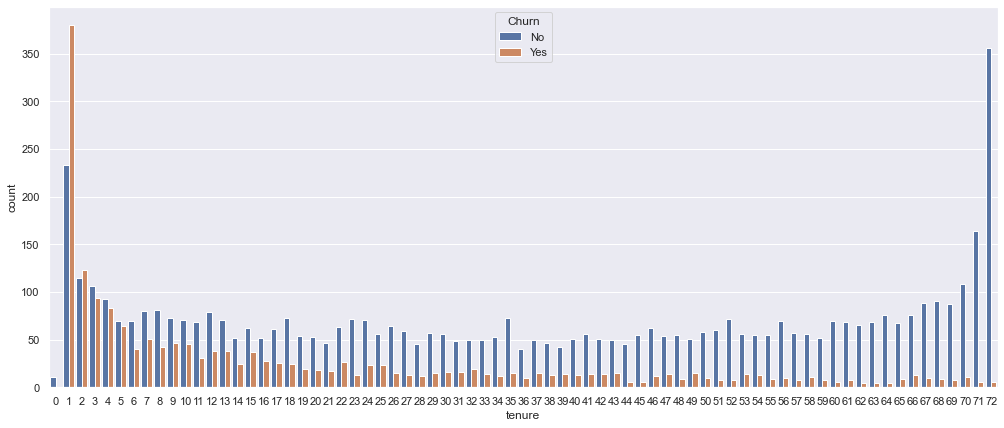

In [23]:
plt.figure(figsize=(17, 7))
sns. set(color_codes=True)
sns.countplot(x='tenure',hue='Churn',data= df )

Churn is high where tenure is less.
where tenure is 1 churn very high.
churn is high where tenure is 1 to 6.
after that where tenure is increasing Churn is decreasing.

<AxesSubplot:xlabel='Dependents', ylabel='count'>

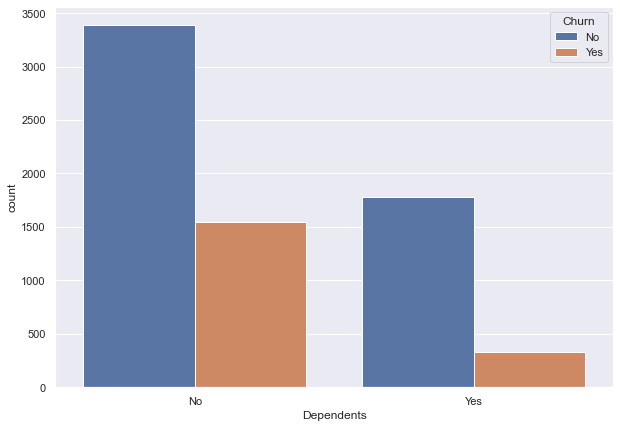

In [24]:
plt.figure(figsize=(10, 7))
sns. set(color_codes=True)
sns.countplot(x='Dependents',hue='Churn',data= df )

We notice we have more cs those don't have dependents.
Churn is also more in those cx, those not having dependents

<AxesSubplot:xlabel='Partner', ylabel='count'>

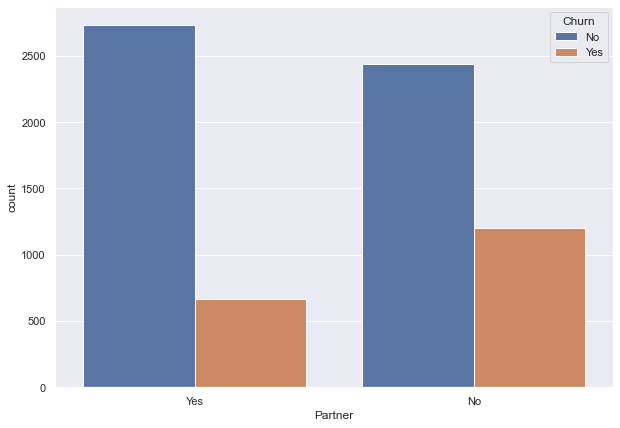

In [25]:
plt.figure(figsize=(10, 7))
sns. set(color_codes=True)
sns.countplot(x='Partner',hue='Churn',data= df )

We can see Churn is less in Partner, more in customer those are not partner

<AxesSubplot:xlabel='SeniorCitizen', ylabel='count'>

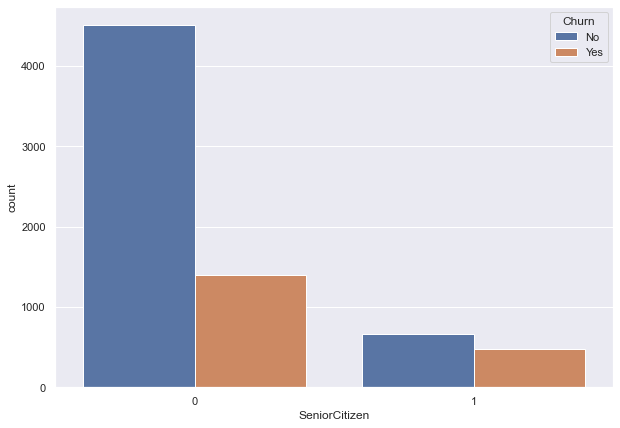

In [26]:
plt.figure(figsize=(10, 7))
sns. set(color_codes=True)
sns.countplot(x='SeniorCitizen',hue='Churn',data= df )

Churn is less in SeniorCitizen, Must be we have less no customer in seniors

<AxesSubplot:xlabel='gender', ylabel='count'>

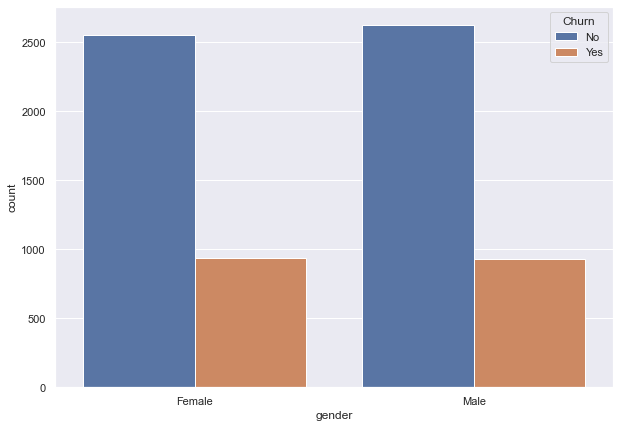

In [27]:
plt.figure(figsize=(10, 7))
sns. set(color_codes=True)
sns.countplot(x='gender', hue='Churn',data= df )

Churn is almost same in all gender, male and female

## Using LabelEncoder for convering categorical to numerical

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


In [31]:
from sklearn.preprocessing import LabelEncoder

In [32]:
# Total Charges should be numerical coverting that into numerical
le=LabelEncoder()
df['TotalCharges'] = le.fit_transform(df['TotalCharges'])

In [33]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,2505,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1466,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,157,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1400,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,925,Yes


<AxesSubplot:xlabel='Churn', ylabel='TotalCharges'>

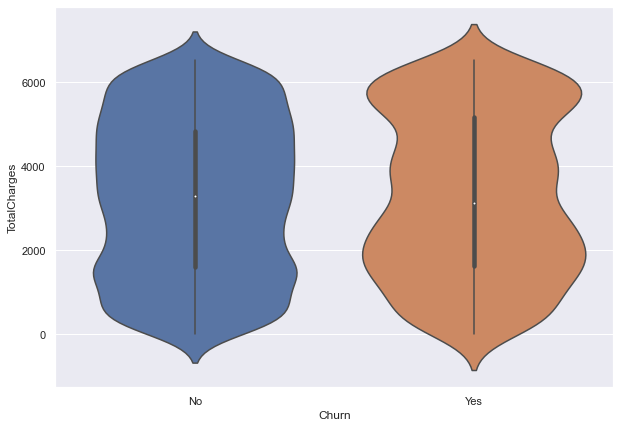

In [34]:
plt.figure(figsize=(10, 7))
sns.violinplot(x='Churn', y='TotalCharges',data=df )

Churn is little higher in cx those total bill around 2000 and 5800

<AxesSubplot:xlabel='Churn', ylabel='MonthlyCharges'>

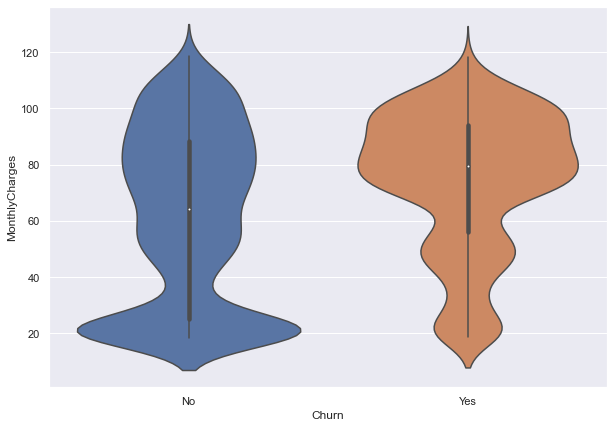

In [35]:
plt.figure(figsize=(10, 7))
sns.violinplot(x='Churn', y='MonthlyCharges',data=df )

We can notice Churn Rate high in cx their MonthlyCharges are 80 to 100,
Churn is low their monthly Charges are 20 to 60

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


In [37]:
#Encoding object columns into Numeric Values in df_train
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
categ_data = df.select_dtypes(exclude=['int64', 'float','int32'])
for val in categ_data:
    df[val]=le.fit_transform(df[val].astype(str))

In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   int32  
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   int32  
 3   Dependents        7043 non-null   int32  
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   int32  
 6   MultipleLines     7043 non-null   int32  
 7   InternetService   7043 non-null   int32  
 8   OnlineSecurity    7043 non-null   int32  
 9   OnlineBackup      7043 non-null   int32  
 10  DeviceProtection  7043 non-null   int32  
 11  TechSupport       7043 non-null   int32  
 12  StreamingTV       7043 non-null   int32  
 13  StreamingMovies   7043 non-null   int32  
 14  Contract          7043 non-null   int32  
 15  PaperlessBilling  7043 non-null   int32  
 16  PaymentMethod     7043 non-null   int32  


here, we can see that ,all columns are converted into numerical now

In [39]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,2505,0
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1466,0
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,157,1
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1400,0
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,925,1


## Checking Outliers

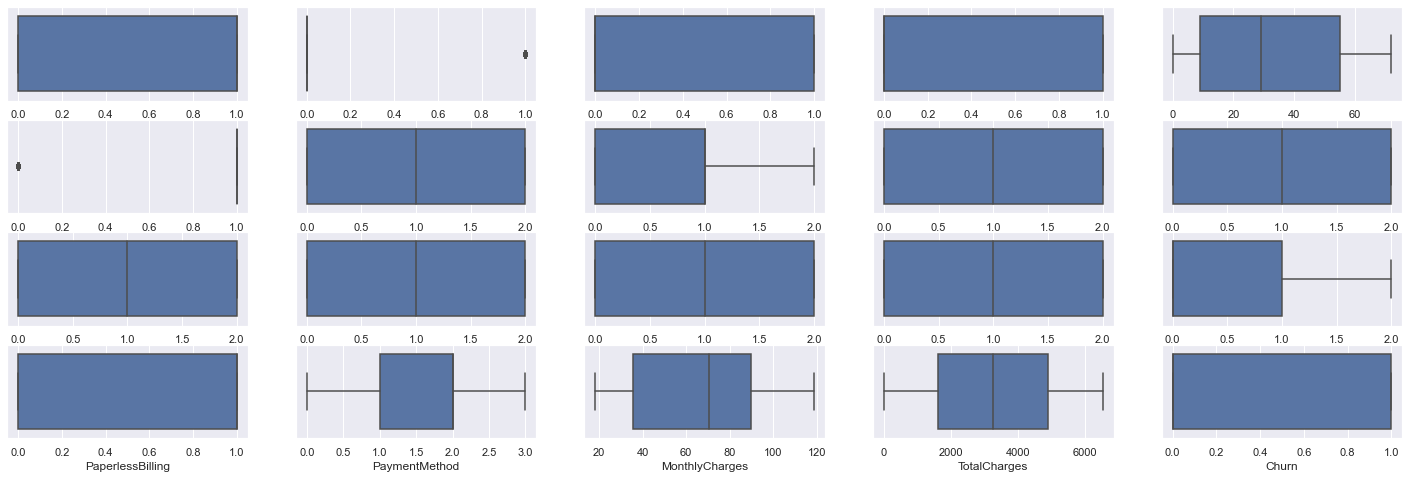

In [42]:
plt.figure(figsize=(25,10))
for o in enumerate(df):
    plt.subplot(5,5,o[0]+1)
    sns.boxplot(df[o[1]])

here, we can sse that

## Skewness handling

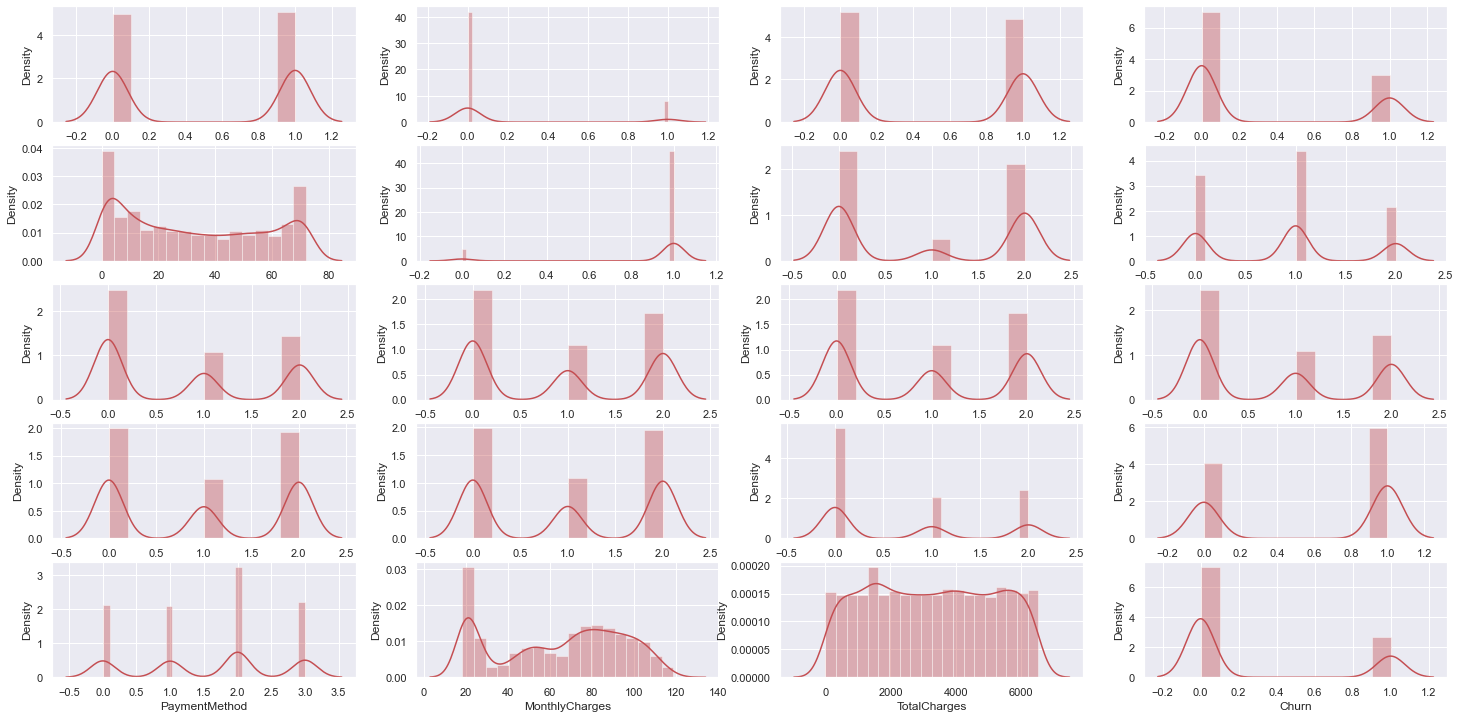

In [44]:
plt.figure(figsize=(25,20))
for i in enumerate(df.columns):
    plt.subplot(8,4,i[0]+1)
    sns.distplot(df[i[1]],color='r')

In [45]:
df.skew()

gender             -0.019031
SeniorCitizen       1.833633
Partner             0.067922
Dependents          0.875199
tenure              0.239540
PhoneService       -2.727153
MultipleLines       0.118719
InternetService     0.205423
OnlineSecurity      0.416985
OnlineBackup        0.182930
DeviceProtection    0.186847
TechSupport         0.402365
StreamingTV         0.028486
StreamingMovies     0.014657
Contract            0.630959
PaperlessBilling   -0.375396
PaymentMethod      -0.170129
MonthlyCharges     -0.220524
TotalCharges        0.015857
Churn               1.063031
dtype: float64

#### skewness more than+/- 0.5 will we treated
#### Categorical and Churn columns will no be treated
#### will only deal with numercal columns
#### We don't see any skewness in numerical columns
#### MonthlyCharges and TotalCharges
#### all other columns are categorical

we can see here skewness is removed from all numerical columns

### We are dealing with skenwness and outliers in category features

## Dividing data into X and Y

In [46]:
x=df.drop(['Churn'],axis=1)
y=df['Churn']

In [47]:
x.shape

(7043, 19)

In [48]:
y.shape

(7043,)

### scaling X values

In [49]:
from sklearn.preprocessing import MinMaxScaler
sc=MinMaxScaler()
x=sc.fit_transform(x)

In [50]:
pd.DataFrame(x).isnull().sum()

0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
13    0
14    0
15    0
16    0
17    0
18    0
dtype: int64

In [51]:
pd.DataFrame(x).describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
count,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.504756,0.162147,0.483033,0.299588,0.449599,0.903166,0.470254,0.436462,0.395002,0.453216,0.452222,0.398552,0.492688,0.496237,0.345236,0.592219,0.524776,0.462803,0.498896
std,0.500013,0.368612,0.499748,0.458110,0.341104,0.295752,0.474277,0.368898,0.429924,0.440081,0.439974,0.430775,0.442501,0.442545,0.416878,0.491457,0.356035,0.299403,0.289233
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.125000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.333333,0.171642,0.246401
50%,1.000000,0.000000,0.000000,0.000000,0.402778,1.000000,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000,0.000000,1.000000,0.666667,0.518408,0.497550
75%,1.000000,0.000000,1.000000,1.000000,0.763889,1.000000,1.000000,0.500000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.500000,1.000000,0.666667,0.712438,0.750613
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


data have been scalled

## Imbalanced learn

Using OverSamling_BorderlineSMOTE

because there is less data in Churn for yes

<AxesSubplot:xlabel='Churn', ylabel='count'>

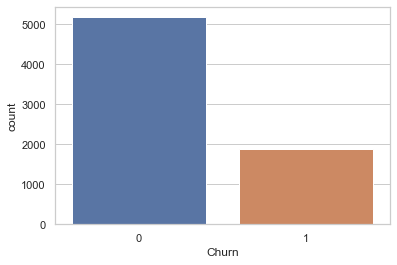

In [52]:
sns.set_style("whitegrid")
sns.countplot(x="Churn", data=df)

In [53]:
from imblearn.over_sampling import BorderlineSMOTE
x_rus, y_rus =BorderlineSMOTE().fit_resample(x, y)
print('original  Target dataset shape:',y.shape)
print('Resample Target dataset shape',y_rus.shape)

original  Target dataset shape: (7043,)
Resample Target dataset shape (10348,)


<AxesSubplot:xlabel='Churn', ylabel='count'>

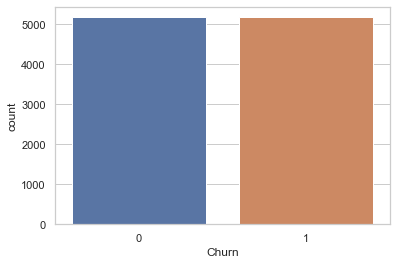

In [54]:
sns.set_style("whitegrid")
sns.countplot(y_rus)

we can see that,data have been balanced

## Spliting Train and Test data

In [55]:
from sklearn.model_selection import train_test_split

In [56]:
x_train,x_test,y_train,y_test=train_test_split(x_rus,y_rus,test_size=.27,random_state=42)

In [57]:
x_train.shape

(7554, 19)

In [58]:
x_test.shape

(2794, 19)

In [59]:
y_train.shape

(7554,)

In [60]:
y_test.shape

(2794,)

## MODEL BUILDING:

In [61]:
#Importing necessary libraries

from sklearn.linear_model import LogisticRegression

from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

import warnings
from sklearn.model_selection import cross_val_score
warnings.filterwarnings('ignore')

### LogisticRegression

In [63]:
logreg=LogisticRegression()
logreg_score=cross_val_score(logreg,x_rus,y_rus,cv=5,scoring='accuracy')
print("cross validation score:",np.mean(logreg_score))

cross validation score: 0.753865037837131


In [64]:
logreg.fit(x_train,y_train)
LR_predicted=logreg.predict(x_test)

print(accuracy_score(y_test,LR_predicted))
print(confusion_matrix(y_test,LR_predicted))
print(classification_report(y_test,LR_predicted))
print("Training accuracy::",logreg.score(x_train,y_train))
print("Test accuracy::",logreg.score(x_test,y_test))

0.7698639942734431
[[1031  389]
 [ 254 1120]]
              precision    recall  f1-score   support

           0       0.80      0.73      0.76      1420
           1       0.74      0.82      0.78      1374

    accuracy                           0.77      2794
   macro avg       0.77      0.77      0.77      2794
weighted avg       0.77      0.77      0.77      2794

Training accuracy:: 0.7487423881387344
Test accuracy:: 0.7698639942734431


### DECISION TREE CLASSIFIER

In [65]:
dtc=DecisionTreeClassifier()
dtc_score=cross_val_score(dtc,x_rus,y_rus,cv=5,scoring='accuracy')
print("cross validation score for svm:",np.mean(dtc_score))

cross validation score for svm: 0.7808376237207642


In [66]:
dtc.fit(x_train,y_train)
predicted_dtc=dtc.predict(x_test)
print(accuracy_score(y_test,predicted_dtc))
print(confusion_matrix(y_test,predicted_dtc))
print(classification_report(y_test,predicted_dtc))
print("Training accuracy::",dtc.score(x_train,y_train))
print("Test accuracy::",dtc.score(x_test,y_test))

0.7802433786685755
[[1105  315]
 [ 299 1075]]
              precision    recall  f1-score   support

           0       0.79      0.78      0.78      1420
           1       0.77      0.78      0.78      1374

    accuracy                           0.78      2794
   macro avg       0.78      0.78      0.78      2794
weighted avg       0.78      0.78      0.78      2794

Training accuracy:: 0.9989409584326184
Test accuracy:: 0.7802433786685755


### KNeighborsClassifier

In [67]:
knn=KNeighborsClassifier()
knn_score=cross_val_score(knn,x_rus,y_rus,cv=5,scoring='accuracy')
print("cross validation score for knn:",np.mean(knn_score))

cross validation score for knn: 0.786918883074976


In [68]:
knn.fit(x_train,y_train)
predicted_knn=knn.predict(x_test)
print(accuracy_score(y_test,predicted_knn))
print(confusion_matrix(y_test,predicted_knn))
print(classification_report(y_test,predicted_knn))
print("Training accuracy::",knn.score(x_train,y_train))
print("Test accuracy::",knn.score(x_test,y_test))

0.7891911238367931
[[ 944  476]
 [ 113 1261]]
              precision    recall  f1-score   support

           0       0.89      0.66      0.76      1420
           1       0.73      0.92      0.81      1374

    accuracy                           0.79      2794
   macro avg       0.81      0.79      0.79      2794
weighted avg       0.81      0.79      0.79      2794

Training accuracy:: 0.8408790045009267
Test accuracy:: 0.7891911238367931


### RandomForestClassifier

In [69]:
rfc=RandomForestClassifier()
rfc_score=cross_val_score(rfc,x_rus,y_rus,cv=5,scoring='accuracy')
print("cross validation score for rfc:",np.mean(rfc_score))

cross validation score for rfc: 0.8522521790498339


In [70]:
rfc.fit(x_train,y_train)
predicted_rfc=rfc.predict(x_test)
print(accuracy_score(y_test,predicted_rfc))
print(confusion_matrix(y_test,predicted_rfc))
print(classification_report(y_test,predicted_rfc))
print("Training accuracy::",rfc.score(x_train,y_train))
print("Test accuracy::",rfc.score(x_test,y_test))

0.8636363636363636
[[1209  211]
 [ 170 1204]]
              precision    recall  f1-score   support

           0       0.88      0.85      0.86      1420
           1       0.85      0.88      0.86      1374

    accuracy                           0.86      2794
   macro avg       0.86      0.86      0.86      2794
weighted avg       0.86      0.86      0.86      2794

Training accuracy:: 0.9989409584326184
Test accuracy:: 0.8636363636363636


## ENSEMBLE TECHNIQUES
### 1.ADA BOOST CLASSIFIER

In [71]:
adb=AdaBoostClassifier()
adb_score=cross_val_score(adb,x_rus,y_rus,cv=10,scoring='accuracy')
print("cross validation score for Ada boost:",np.mean(adb_score))

cross validation score for Ada boost: 0.808182285388576


In [72]:
adb.fit(x_train,y_train)
predicted_adb=adb.predict(x_test)
print(accuracy_score(y_test,predicted_adb))
print(confusion_matrix(y_test,predicted_adb))
print(classification_report(y_test,predicted_adb))
print("Training accuracy::",adb.score(x_train,y_train))
print("Test accuracy::",adb.score(x_test,y_test))

0.8228346456692913
[[1105  315]
 [ 180 1194]]
              precision    recall  f1-score   support

           0       0.86      0.78      0.82      1420
           1       0.79      0.87      0.83      1374

    accuracy                           0.82      2794
   macro avg       0.83      0.82      0.82      2794
weighted avg       0.83      0.82      0.82      2794

Training accuracy:: 0.8116229812020122
Test accuracy:: 0.8228346456692913


### 2.BAGGING CLASSIFIER

In [73]:
bgc=BaggingClassifier()
bgc_score=cross_val_score(bgc,x_rus,y_rus,cv=10,scoring='accuracy')
print("cross validation score for BAGGING Classifier:",np.mean(bgc_score))

cross validation score for BAGGING Classifier: 0.8367928124912398


In [74]:
bgc.fit(x_train,y_train)
predicted_bgc=bgc.predict(x_test)
print(accuracy_score(y_test,predicted_bgc))
print(confusion_matrix(y_test,predicted_bgc))
print(classification_report(y_test,predicted_bgc))
print("Training accuracy::",bgc.score(x_train,y_train))
print("Test accuracy::",bgc.score(x_test,y_test))

0.8303507516105941
[[1208  212]
 [ 262 1112]]
              precision    recall  f1-score   support

           0       0.82      0.85      0.84      1420
           1       0.84      0.81      0.82      1374

    accuracy                           0.83      2794
   macro avg       0.83      0.83      0.83      2794
weighted avg       0.83      0.83      0.83      2794

Training accuracy:: 0.990998146677257
Test accuracy:: 0.8303507516105941


### 3.Gradient Boosting classifier

In [75]:
grbc=GradientBoostingClassifier()
grbc_score=cross_val_score(grbc,x_rus,y_rus,cv=10,scoring='accuracy')
print("cross validation score for Gradient Boosting Classifier:",np.mean(grbc_score))

cross validation score for Gradient Boosting Classifier: 0.8309911324157392


In [76]:
grbc.fit(x_train,y_train)
predicted_grbc=grbc.predict(x_test)
print(accuracy_score(y_test,predicted_grbc))
print(confusion_matrix(y_test,predicted_grbc))
print(classification_report(y_test,predicted_grbc))
print("Training accuracy::",grbc.score(x_train,y_train))
print("Test accuracy::",grbc.score(x_test,y_test))

0.8428775948460988
[[1141  279]
 [ 160 1214]]
              precision    recall  f1-score   support

           0       0.88      0.80      0.84      1420
           1       0.81      0.88      0.85      1374

    accuracy                           0.84      2794
   macro avg       0.85      0.84      0.84      2794
weighted avg       0.85      0.84      0.84      2794

Training accuracy:: 0.8474980142970612
Test accuracy:: 0.8428775948460988


ADA BOOST CLASSIFIER as final model

for HYPER PARAMETER TUNING because both train and test accuracies are pretty close and highest as well

Rest of the models having huge difference between train and test accuracies so not considering them

## HYPER PARAMETER TUNING:

In [77]:
adb=AdaBoostClassifier()
param_grid={
    'algorithm' : ['SAMME.R'],
    'n_estimators':[50,200],
    'learning_rate':[0.1,0.5],
     'random_state':[10]              
}

In [78]:
adb_grid=GridSearchCV(AdaBoostClassifier(),param_grid,cv=4,scoring='accuracy',n_jobs=-1,verbose=2)

In [79]:
adb_grid.fit(x_train,y_train)
adb_pred=adb_grid.best_estimator_.predict(x_test)
print("Accuracy after parameter tuning::",accuracy_score(y_test,adb_pred))

Fitting 4 folds for each of 4 candidates, totalling 16 fits
Accuracy after parameter tuning:: 0.8242662848962061


In [80]:
adb_grid.best_params_

{'algorithm': 'SAMME.R',
 'learning_rate': 0.5,
 'n_estimators': 200,
 'random_state': 10}

#### model training with best parameters

In [81]:
best_param={
    'algorithm' : ['SAMME.R'],
    'n_estimators':[200],
    'learning_rate':[0.5],
     'random_state':[10]    
}

In [82]:
best_adb_grid=GridSearchCV(AdaBoostClassifier(),best_param,cv=10,scoring='accuracy',n_jobs=-1,verbose=2)

In [83]:
best_adb_grid.fit(x_train,y_train)
best_adb_pred=best_adb_grid.best_estimator_.predict(x_test)
print("Accuracy after parameter tuning::",accuracy_score(y_test,best_adb_pred))

Fitting 10 folds for each of 1 candidates, totalling 10 fits
Accuracy after parameter tuning:: 0.8242662848962061


As we notice after HYPER PARAMETER TUNING models accuracy score got little bit increased

## Report of AdaBoostClassifier

In [84]:
print("CLASSIFICATION REPORT::\n",classification_report(y_test,best_adb_pred))

CLASSIFICATION REPORT::
               precision    recall  f1-score   support

           0       0.86      0.78      0.82      1420
           1       0.79      0.87      0.83      1374

    accuracy                           0.82      2794
   macro avg       0.83      0.83      0.82      2794
weighted avg       0.83      0.82      0.82      2794



<AxesSubplot:>

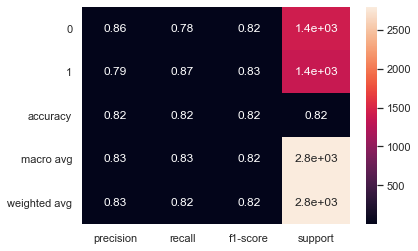

In [85]:
clsf_repo = classification_report(y_test,best_adb_pred,output_dict=True)
sns.heatmap(pd.DataFrame(clsf_repo).T, annot=True)

In [86]:
from sklearn.metrics import roc_auc_score

In [87]:
print("roc auc score::",roc_auc_score(y_test, best_adb_pred))

roc auc score:: 0.8250850810832975


In [88]:
from sklearn.metrics import roc_curve

In [89]:
fpr1, tpr1, thresh1 = roc_curve(y_test, best_adb_pred, pos_label=1)

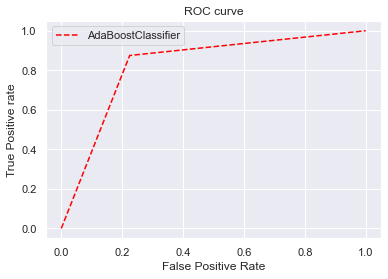

In [90]:
#plotting ROC CURVE
sns.set_theme(style="darkgrid")
plt.plot(fpr1, tpr1, linestyle='--',color='red', label='AdaBoostClassifier')

plt.title('ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')

## Saving Model:

In [91]:
import joblib

In [92]:
joblib.dump(best_adb_grid.best_estimator_,'Customer Churn Analysis.obj')

['Customer Churn Analysis.obj']